# Disciplina: Ciência e Visualização de Dados na Saúde
## Projeto: Uma abordagem preditiva para potenciais casos de AVC
### Entrega 2: Análise Exploratória dos Dados
### Grupo:
1.   Márcia Jacobina Andrade Martins RA: 225269
2.   Regivaldo Sousa Ferreira RA: 225153
3.   Amanda Consulin RA: 234942



## 1 - Introdução

Dando continuidade ao projeto intitulado “Uma Abordagem Preditiva para Potenciais Casos de Acidente Vascular Cerebral (AVC)”, será efetuada uma análise exploratória da base de dados identificada para o projeto.

O objetivo é identificar padrões nos dados dos pacientes para efetuar uma predição das pessoas que possuem risco de terem AVC durante a sua vida.

Vale lembrar que o AVC causa seis milhões de óbitos por ano, deste total, 50% das pessoas ficam dependentes de outra para atividades do dia a dia e 70% não conseguem retornar mais ao trabalho. 

Suas causas são complexas e suas chances de acometimento podem ser aumentadas quando o indivíduo possui um ou mais fatores de risco relacionados à doença como: alto nível de glicose no sangue, alta taxa de colesterol e triglicérides e doenças cardiovasculares, como hipertensão arterial e arritmias cardíacas, além de hábitos de vida prejudiciais à saúde como sedentarismo, tabagismo e etilismo. 

In [1]:
# Importando pacotes
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2 - Leitura dos Dados


### 2.1 - Dicionário de Dados

* id: Identificador único do paciente
* gender: Gênero do paciente (Male/Female/Other)
* age: idade do paciente
* hypertension: Se o paciente é hipertenso ou não (0: não hipertenso, 1: hipertenso)
* heart_disease: Se paciente possui doença do coração ou não (0: não possui, 1: possui)
* ever_married: Se o paciente casou-se uma ou mais vezes (0: foi ou é casado, 1: não foi casado)
* work_type: Tipo do trabalho exercido pelo paciente, por esse campo é possível identificar se é uma criança (children/Govt_jov/Never_worked/Private)
* Residence_type: Tipo de residência, se rural ou urbana (Rural/Urban)
* avg_glucose_level: taxa média de glicose no sangue
* bmi: índice de massa muscular
* smoking_status: Se o paciente fuma, já foi fumante ou não fuma (formely smoked/never_smoked/smokes/Unknown) 
* stroke: 1 se o paciente teve um AVC e 0 se nunca teve um AVC
OBS: "Unknown" na variável *smoking_status* significa que não se tem essa informação do paciente

In [2]:
# Usando o método read_csv para leitura do arquivo de zombies
url="https://raw.githubusercontent.com/regivaldo717/C_A_D_S/main/data/raw/Stroke_K_data_base1.csv"
# Copiando os dados para um dataframe
df_stroke=pd.read_csv(url, sep=',')

In [3]:
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Verificando os tipos das colunas
#df_stroke.columns
df_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Percebe-se que existem algumas colunas como objeto. Para verificar a correlação, serão transformadas em numéricas.

## 3 - Análise Exploratória dos Dados

In [5]:
# Verificando as Estatísticas descritivas
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Verificando as Estatísticas descritivas das variáveis categóricas
round (df_stroke.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Analisando as estatísticas, percebe-se que existem dados *missing* na columa *bmi* (indicador de massa corporal). A média da idade é em torno de 43 anos, a maioria não é hipertenso (média próxima de 0), a maioria não tem doença do coração (média próxima de 0), a média do nível de glicose fica em torno de 106, o percentual da massa muscular é de 28.8 e poucos pacientes tiveram AVC, pois a média é próxima de 0.

Em relação às variáveis categóricas, a maior parte dos pacientes são do sexo feminino, já foram casados e o tipo de trabalho que exercem é privado. A maior parte deles, também, nunca fumou. Aproximadamente, metade dos pacientes possuem residência urbana.

In [7]:
# Analisando se existem objetos nulos na base
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 3.1 Identificação dados missing

In [8]:
# Verificando quais colunas possuem dados nulos
df_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Percebe-se que existem 201 dados nulos na coluna *bmi*. Esses dados serão preenchidos com a média por gênero. 

### 3.2 Visualizando graficamente os dados

In [9]:
# Análise Exploratória dos Dados
# Visualizando graficamente as variáveis numéricas e categórias do dataframe

# Definindo uma função para plotagem dos gráficos
def plotagem (df_plt1,cond):
    fig, axs = plt.subplots(4, 3, figsize=(15,12))
    fig.tight_layout(pad=2.0)
    # Dados para cada subplot

    # gender
    x=df_plt1['gender'].value_counts()
    sizes=[]
    colors=['skyblue','wheat','r']
    if (cond==1):
        sizes.append(round(x['Male']/df_plt1['gender'].count()*100,2))
        sizes.append(round(x['Female']/df_plt1['gender'].count()*100,2))
        sizes.append(round(x['Other']/df_plt1['gender'].count()*100,2))
        explode=(0,0.1,0)
    else:
        sizes.append(round(x['Male']/df_plt1['gender'].count()*100,2))
        sizes.append(round(x['Female']/df_plt1['gender'].count()*100,2))
        explode=(0,0.1)
    labels=df_plt1['gender'].unique()
    axs[0,0].pie(sizes, labels=labels, autopct='%2.1f%%',
            shadow=True, startangle=90, explode=explode, colors=colors)

    # hypertension
    z=pd.array(['0','1'])
    y=df_plt1['hypertension'].value_counts()
    x=y.index
    if (x[0]==0):
       z[0]='False'
       z[1]='True'
    else:
       z[0]='True'
       z[1]='False'
    axs[0,1].bar(z,y, color='cornflowerblue')

    # age
    axs[0,2].hist(df_plt1['age'],color='mediumpurple',alpha=0.60, bins=10)

    #smoking_status
    y=df_plt1['smoking_status'].value_counts()
    x=y.index
    axs[1,0].barh(x, y, height=0.8, left=None,color='seagreen')

    #ever_married
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    x=df_plt1['ever_married'].value_counts()
    sizes=[]
    sizes.append(round(x['Yes']/df_plt1['ever_married'].count()*100,2))
    sizes.append(100-round(x['Yes']/df_plt1['ever_married'].count()*100,2))
    axs[1,1].pie(sizes, labels=x.index, autopct='%2.1f%%',
           shadow=True, startangle=90, colors=colors, explode=(0.1,0))

    #avg_glucose_level
    axs[1,2].hist(df_plt1['avg_glucose_level'],color='brown',alpha=0.60)

    #work_type
    y=df_plt1['work_type'].value_counts()
    x=y.index
    axs[2,0].barh(x, y, height=0.8, left=None,color='goldenrod')

    #residence_type  
    y=df_plt1['residence_type'].value_counts()
    x=y.index
    axs[2,1].bar(x, y,color='sandybrown')

    #heart_disease
    x=df_plt1['heart_disease'].value_counts()
    sizes=[]
    colors=['darkseagreen','peachpuff']
    sizes.append(round(x[0]/df_plt1['heart_disease'].count()*100,2))
    sizes.append(100-round(x[0]/df_plt1['heart_disease'].count()*100,2))
    y=x.index
    if (y[0]==0):
       z[0]='False'
       z[1]='True'
    else:
       z[0]='True'
       z[1]='False'
    axs[2,2].pie(sizes, labels=z, autopct='%2.1f%%',
            shadow=True, startangle=90, explode=(0.1,0), colors=colors)

    #bmi
    axs[3,0].hist(df_plt1['bmi'],color='salmon', alpha=0.80)

    #stroke
    colors = ['cadetblue','#ffcc99']
    if (cond==1):
       x=df_plt1['stroke'].value_counts()
       sizes=[]
       sizes.append(round(x[0]/df_plt1['stroke'].count()*100,2))
       sizes.append(100-round(x[0]/df_plt1['stroke'].count()*100,2))
       y=x.index
       if (y[0]==0):
          z[0]='False'
          z[1]='True'
       else:
          z[0]='True'
          z[1]='False'
       axs[3,1].pie(sizes, labels=z, autopct='%2.1f%%',
              shadow=True, startangle=90, explode=(0.1,0), colors=colors)
       axs[3,1].set(title='Percentual AVC')
    else:
       axs[3,1].axis('off')
       axs[3,1].get_xaxis().set_visible(False)
       axs[3,1].get_yaxis().set_visible(False)
    
    axs[3,2].axis('off')
    axs[3,2].get_xaxis().set_visible(False)
    axs[3,2].get_yaxis().set_visible(False)

    axs[0,0].set(title='Percentual por Gênero')
    axs[0,1].set(title='Qtde Hipertensos')
    axs[0,2].set(title='Histograma Idade')
    axs[1,0].set(title='Condição de Fumante')
    axs[1,1].set(title='Percentual Casado (alguma vez)')
    axs[1,2].set(title='Histograma Nível Médio de Glicose')
    axs[2,0].set(title='Tipo de Trabalho')
    axs[2,1].set(title='Tipo de Residência')
    axs[2,2].set(title='Percentual Doença do Coração')
    axs[3,0].set(title='Histograma Índice de Massa Corporal')
    

    plt.show()
    return

In [10]:
# Copiando o dataframe original 

# Modificando o nome de uma coluna
df_stroke.rename(columns={'Residence_type':'residence_type'}, inplace=True)
df2=df_stroke.copy()

# Apresentando os quantitativos das bases
print ("Quantidade de registros na base: ",df2['id'].count(),"\n")
print (df2['gender'].value_counts(), "\n")
print (df2['hypertension'].value_counts(),"\n")
print (df2['smoking_status'].value_counts(),"\n")
print (df2['work_type'].value_counts(),"\n")
print (df2['residence_type'].value_counts(),"\n")
print (df2['heart_disease'].value_counts(),"\n")
print (df2['stroke'].value_counts(),"\n")

Quantidade de registros na base:  5110 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

0    4612
1     498
Name: hypertension, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2514
Name: residence_type, dtype: int64 

0    4834
1     276
Name: heart_disease, dtype: int64 

0    4861
1     249
Name: stroke, dtype: int64 



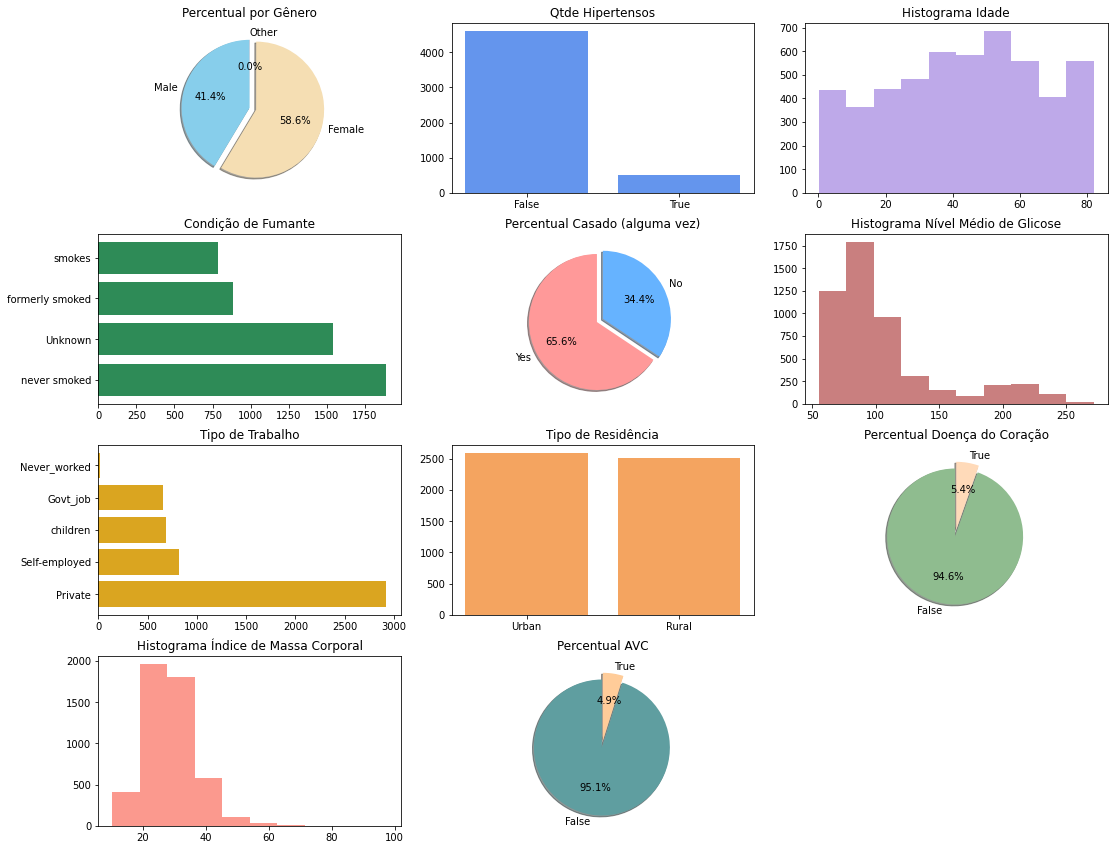

In [11]:
# Visualizando graficamente o conjunto original dos dados
plotagem(df_stroke,1)

Análise dos gráficos:

* O total da base de dados é de 5110 registros.
* Em relação ao gênero, 41,4% é do gênero masculino e 58,6% é do gênero feminino. Existe um outlier que não tem o gênero identificado e será removido na etapa de tratamento de dados. A partir do bmi, idade e das outras features, tentou-se inferir o gênero, mas não houve um indicativo do sexo, optando-se por removê-lo. 
* Sobre a hipertensão, a maioria dos pacientes não são hipertensos. Existem 498 hipertensos.
* A distribuição das idades não é uma distribuição normal. Percebe-se que a concentração da idade dos pacientes fica na faixa etária entre 40 e 60 anos. 
* Existe uma grande quantidade de pacientes que nunca fumaram (1892), dados desconhecidos (1544) e fumantes e ex-fumantes que totalizam  1674. Os dados desconhecidos não serão preenchidos e como o volume é muito alto, também não poderão ser removidos.
* Em torno de 65% dos pacientes são ou foram casados contra 35% dos pacientes solteiros.
* A maior parte dos pacientes possuem o nível de glicose abaixo de 120.
* Existem 698 pacientes que são crianças (idade até 16 anos). Em relação aos adultos, 2925 trabalham em empregos privados, 819 são autônomos, 657 trabalham para o governo e apenas 22 nunca trabalharam.
* O tipo de residência é bem equilibrado, ficando em torno de 50% rural e 50% urbana.
* Apenas 5,4% possuem doença do coração.
* O índice de massa corporal possui uma distribuição assimétrica à direita ou positiva, sendo que a maior parte dos pacientes possui "bmi" entre 25 e 35.
* E, finalmente, o percentual de pessoas que predispostas ao AVC mostra-se baixo entre os pacientes, apenas 4,9%. 

Vamos procurar entender os pacientes que possuem maior predisposição para o AVC, nesse conjunto de aproximadamente 5% da base.

### 3.3 - Tratamento dos Dados

In [12]:
# Tratando os dados missing da variável BMI 

# Removendo o dado cujo gênero é igual a "Other", que corresponde a um
# percentual mínimo da base, menor que 0,1%, mas que deve ser removido para uma
# melhor análise

df2.drop(df2[df2['gender'] == 'Other'].index, inplace = True)

# Encontrando a média do BMI por gênero

means = df2.groupby('gender')['bmi'].mean()
df2['bmi'].fillna(0,inplace=True)

# Substituindo os valores missing do bmi pela média levando em conta o gênero

df2.loc[(df2['bmi']==0) & (df2['gender']=='Female'),'bmi'] = means[0]
df2.loc[(df2['bmi']==0) & (df2['gender']=='Male'),'bmi'] = means[1]

# Verificando as mudanças efetuadas
df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
# Analisando as idades por tipo de trabalho
rslt_df = df2[df2['work_type'] == 'children']
rslt_df2 = rslt_df[rslt_df['age'] > 15]

# A idade limite para crianças é de 16 anos, o que comprova que 
# não há necessidade de preenchimento ou substituição de idades 
print (rslt_df2)
print (rslt_df['work_type'].count())

         id  gender   age  ...   bmi  smoking_status stroke
292   44338  Female  16.0  ...  19.5         Unknown      0
461   34376  Female  16.0  ...  19.5         Unknown      0
921   32554  Female  16.0  ...  19.8         Unknown      0
1455  72132    Male  16.0  ...  21.9         Unknown      0
2530  45469    Male  16.0  ...  30.6         Unknown      0
3357  32717    Male  16.0  ...  22.4         Unknown      0
3719  49095  Female  16.0  ...  21.2         Unknown      0
4018  29453    Male  16.0  ...  15.8         Unknown      0
4545  40887    Male  16.0  ...  35.1    never smoked      0
4604  46691    Male  16.0  ...  38.7    never smoked      0
4878  30658    Male  16.0  ...  32.6         Unknown      0

[11 rows x 12 columns]
687


In [14]:
df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Foram substituídos os dados missing de bmi, o dado com gênero igual a *Other* foi removido, os dados da idade das crianças estão coerentes (até 16 anos) e existem 687 crianças na base.

Visualizando as Estatísticas descritivas das variáveis numéricas e categóricas, após as transformações.

In [15]:
# Estatísticas descritivas das variáveis numéricas
df2.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.892790,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.698351,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
# Estatísticas descritivas das variáveis categóricas
round (df2.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,residence_type,smoking_status
count,5109,5109,5109,5109,5109
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,1892


## 4 - Análise de Correlação

### 4.1 - Calculando as Correlações de Pearson e Spearman


Transformando as variáveis categóricas

In [17]:
# Transformando variáveis categóricas em numéricas em um novo dataframe
# que será utilizado para o cálculo das correlações

# Transformando dataframe
df3=df2.copy()

df3.loc[df2['gender'] =='Male','gender_num'] = 0
df3.loc[df2['gender'] =='Female','gender_num'] = 1
df3.loc[df2['ever_married'] =='Yes','ever_married_num'] = 1
df3.loc[df2['ever_married'] =='No','ever_married_num'] = 0
df3.loc[df2['smoking_status'] =='never smoked','smoking_status_num'] = 1
df3.loc[df2['smoking_status'] =='Unknown','smoking_status_num'] = 2
df3.loc[df2['smoking_status'] =='formerly smoked','smoking_status_num'] = 3
df3.loc[df2['smoking_status'] =='smokes','smoking_status_num'] = 4
df3.loc[df2['work_type'] =='Private','work_type_num'] = 1
df3.loc[df2['work_type'] =='Self-employed','work_type_num'] = 2
df3.loc[df2['work_type'] =='children','work_type_num'] = 3
df3.loc[df2['work_type'] =='Govt_job','work_type_num'] = 4
df3.loc[df2['work_type'] =='Never_worked','work_type_num'] = 5
df3.loc[df2['residence_type'] =='Urban','residence_type_num'] = 0
df3.loc[df2['residence_type'] =='Rural','residence_type_num'] = 1
df3.drop(columns=["gender","ever_married","work_type","residence_type",
                  "smoking_status","id"], inplace=True)
df3.rename(columns={'gender_num':'gender'}, inplace=True)
df3.rename(columns={'ever_married_num':'ever_married'}, inplace=True)
df3.rename(columns={'work_type_num':'work_type'}, inplace=True)
df3.rename(columns={'residence_type_num':'residence_type'}, inplace=True)
df3.rename(columns={'smoking_status_num':'smoking_status'}, inplace=True)

In [18]:
# Criando função para o cálculo do pvalue

def calculo_p_value (method, dtf, dtf2):
  for i in dtf.columns[0:]:
    for j in dtf.columns[0:]:
      if (method=='pearson'):
          saida = stats.pearsonr(dtf[i], dtf[j])
      else:
          saida = stats.spearmanr(dtf[i], dtf[j])
      dtf2[i][j] = saida[1]
  return 

In [19]:
# Cálculo dos valores das correlações
def calculo_valores_corr (COLUNAS, df_orig):
# Cálculo do pvalue da Correlação de Pearson
  df_pearson = pd.DataFrame(index=COLUNAS, columns=COLUNAS)
  calculo_p_value('pearson',df_orig ,df_pearson)
  df_pearson = round(df_pearson.apply(pd.to_numeric),10)
 # Cálculo do pvalue da Correlação de Spearman
  df_spearman = pd.DataFrame(index=COLUNAS, columns=COLUNAS)
  calculo_p_value('spearman',df_orig, df_spearman)
  df_spearman = round(df_spearman.apply(pd.to_numeric),10)
  return (df_pearson, df_spearman)

In [20]:
def correlacao (df_orig, df_metodo, metodo, tipo, tamfig):
# Plotando a Matriz de Correlação do método escolhido e seu pvalue
 
  f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=tamfig)
  
  ax1.set_title ("Matriz Correlação " + tipo)
  corr = round(df_orig.corr(method=metodo),3)
  mask = np.triu(np.ones_like(corr, dtype=bool))
  ax1 = sns.heatmap(corr, mask=mask,
                    #cmap='RdBu_r',
                    cmap=sns.diverging_palette(220, 10, as_cmap=True),
                    square=True, ax=ax1, annot=True)

  ax2.set_title("PValue Correlação " + tipo)
  df_pearson1=round(df_metodo,3)
  mask2 = np.triu(np.ones_like(df_pearson1, dtype=bool))
  sns.heatmap(df_pearson1,
              mask=mask2,
              cmap="BrBG",
              square=True, ax=ax2, annot=True)
# 'RdBu_r' & 'BrBG' & 'coolwarm' & 'hot' are other good diverging colormaps
#cmaps['Diverging'] = [
#            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
 #           'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
  return

In [21]:
# Calculando a correlação de Pearson e Spearman
(df_r_pearson, df_r_spearman) = calculo_valores_corr (df3.columns, df3)

###4.2 - Matriz de Correlação de Pearson 

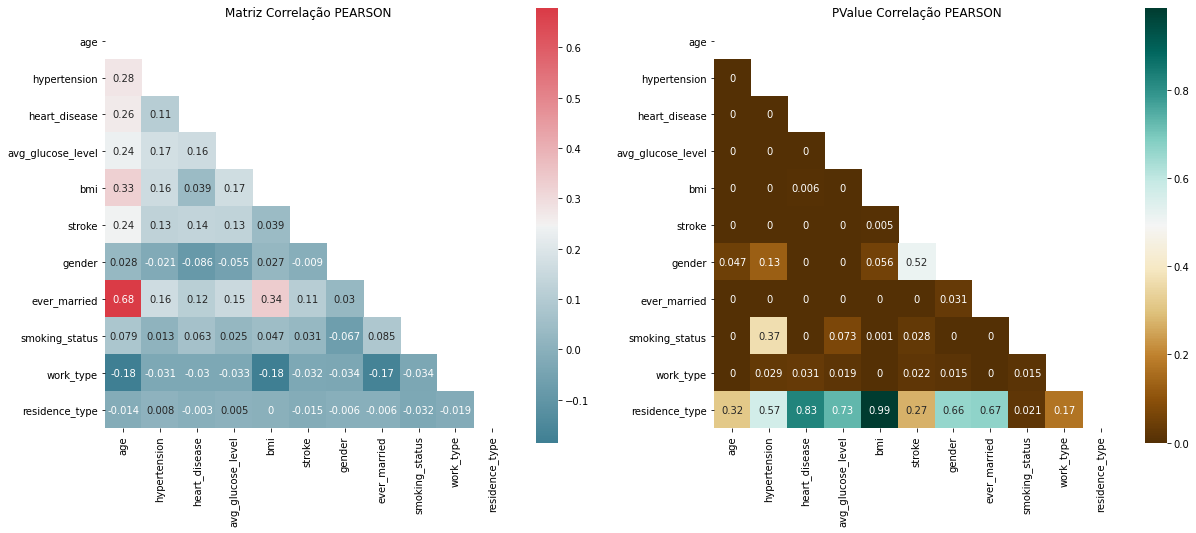

In [22]:
# Plotando a correlação de Pearson
correlacao (df3, df_r_pearson, 'pearson', 'PEARSON', (20,8))

###3.3 - Matriz de Correlação de Spearman 

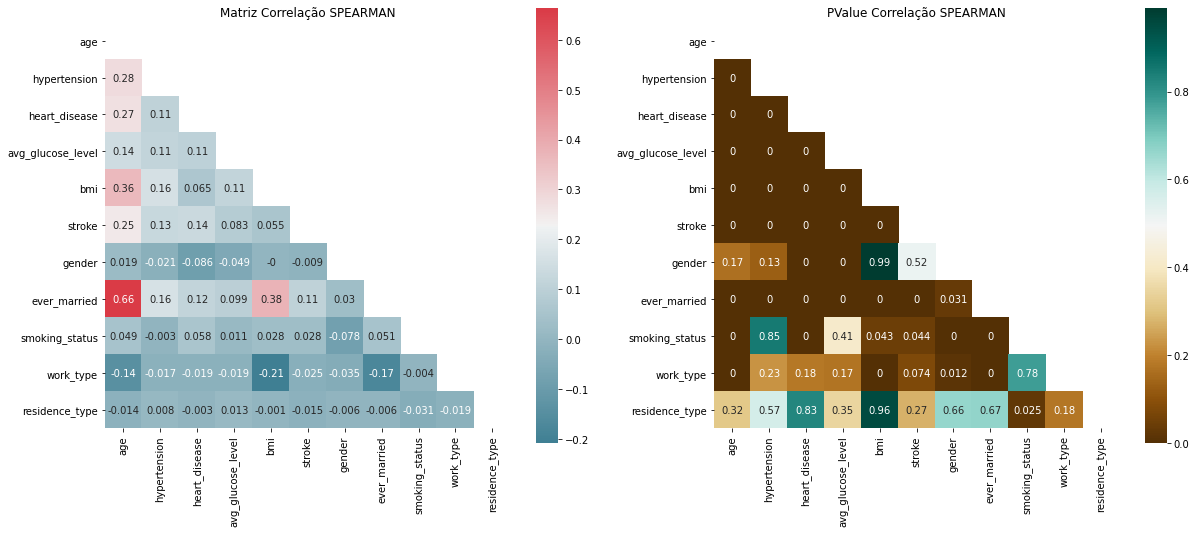

In [23]:
# Plotando a correlação de Spearman
correlacao(df3, df_r_spearman, 'spearman', 'SPEARMAN', (20,8))

Análise das correlações:
1. Correlações moderadas:
   * *age x ever_married*
2. Correlações fracas:
   * *age x stroke*
   * *age x bmi*
   * *age x heart_disease*
   * *age x hypertension* 
   * *bmi x ever_married*

Percebe-se que **não há uma correlação forte** entre a **variável target *stroke* e outros atributos** numéricos do conjunto de dados.

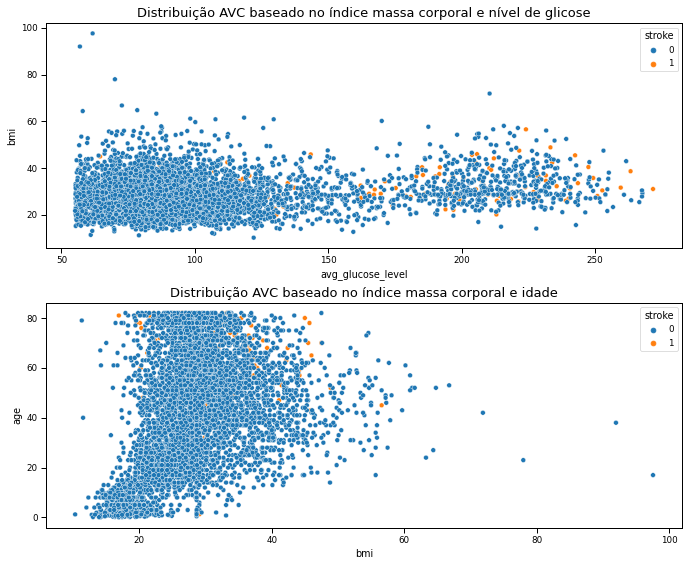

In [24]:
# Analisando algumas correlações

# Verificando a influência do índice de massa corporal no AVC

plt.rc('figure',figsize=(10,8))
sns.set_context('paper',font_scale=1)
plt.subplot(2,1,1)
plt.title('Distribuição AVC baseado no índice massa corporal e nível de glicose',
          fontdict={'size':13})
sns.scatterplot(x=df3['avg_glucose_level'],y=df3['bmi'],hue=df3['stroke'])
plt.subplot(2,1,2)
plt.tight_layout(pad=2.0)
plt.title('Distribuição AVC baseado no índice massa corporal e idade',
          fontdict={'size':13})
sns.scatterplot(x=df3['bmi'],y=df3['age'],hue=df3['stroke'])
plt.show()

Percebe-se que para as pessoas que tiveram AVC, o nível médio de glicose no sangue é superior a 150, tendo uma tendência, nesses casos, para uma massa corporal mais elevada. Embora não seja um indicativo tão forte.

Analisando a massa corporal com a idade, verifica-se que existe uma variação, porém há uma tendência a uma massa corporal mais elevada. Além disso, o que pode ser destacado é a média da idade de quem teve o AVC que está acima de 40 anos.

## 5 - Análise Pacientes que tiveram AVC 

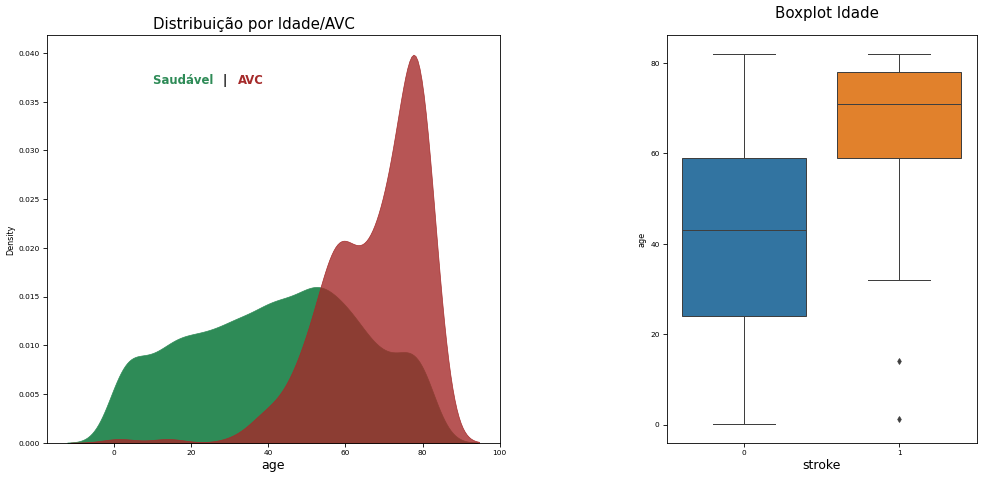

In [25]:
# Distribuição por Idade/AVC

fig = plt.figure(figsize = (20,10), dpi = 60)

gs = fig.add_gridspec(10,20)
gs.update(wspace = 1, hspace = 0.05)

ax1 = fig.add_subplot(gs[1:10, 0:10]) #hue distribution plot
ax2 = fig.add_subplot(gs[1:10,13:]) #dumbbell plot

# axes list
axes = [ ax1, ax2]

# histograma
sns.kdeplot(data = df3[df3['stroke'] == 0], x = 'age', ax = ax1, shade = True,  alpha = 1, color = 'seagreen',legend=True )
sns.kdeplot(data = df3[df3['stroke'] == 1], x = 'age', ax = ax1, shade = True,  alpha = 0.8, color = 'brown', legend=True)


ax1.set_xlabel('age',{'size':15})
ax2.set_xlabel('stroke',{'size':15})

ax1.text(10,0.0425,'Distribuição por Idade/AVC',{'size':18})
ax1.text(10,0.0369, 'Saudável ', {'weight':'bold','size':'14', 'color':'seagreen'})
ax1.text(28,0.0369, '|', {'color':'black' , 'size':'14', 'weight': 'bold'})
ax1.text(32,0.0369, 'AVC',{'size': '14','style':'normal', 'weight':'bold','color':'brown'})

ax2.text(0.2,90,'Boxplot Idade',{'size':18})

#Boxplot
ax2 = sns.boxplot(x="stroke", y="age", data=df3)

fig.show()

Explorando um pouco mais a análise de quem teve o AVC, é possível interpretar os gráficos acima da seguinte forma:
1. Na distribuição da Idade/AVC, percebe-se que a maior parte dos pacientes que tiveram AVC tem uma idade superior a 40 anos, mais fortemente entre 60 e 80 anos.
2. Em relação ao boxplot, o mesmo é evidenciado. Existem alguns outliers, mais a maior parte de quem teve AVC está na faixa etária entre 60 e 80 anos, com uma média de idade na faixa dos 75 anos.

Isso nos faz concluir que pessoas de mais idade tem maior probabilidade de ter AVC de que pessoas mais jovens. Embora, a princípio, seja uma conclusão óbvia, os gráficos nos mostram de uma forma visual essa verdade.

Abaixo será analisado o conjunto dos dados dos pacientes que tiveram AVC, de modo similar ao feito para todo o conjunto de dados.

In [26]:
# Criando um dataframe apenas com pacientes que tiveram AVC
df4=df2.loc[(df2['stroke'] == 1)]

# Apresentando os quantitativos dessa base
print ("Quantidade de registros na base pacientes que tiveram AVC: ",df4['id'].count(),"\n")
print (df4['gender'].value_counts(), "\n")
print (df4['hypertension'].value_counts(),"\n")
print (df4['smoking_status'].value_counts(),"\n")
print (df4['work_type'].value_counts(),"\n")
print (df4['residence_type'].value_counts(),"\n")
print (df4['heart_disease'].value_counts(),"\n")
print (df4['stroke'].value_counts(),"\n")

Quantidade de registros na base pacientes que tiveram AVC:  249 

Female    141
Male      108
Name: gender, dtype: int64 

0    183
1     66
Name: hypertension, dtype: int64 

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64 

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64 

Urban    135
Rural    114
Name: residence_type, dtype: int64 

0    202
1     47
Name: heart_disease, dtype: int64 

1    249
Name: stroke, dtype: int64 



In [27]:
df5=df4.loc[(df4['avg_glucose_level'] >=160)&(df4['avg_glucose_level']<=250)]
df5

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235,1210,Female,68.0,0,0,Yes,Private,Rural,211.06,39.300000,Unknown,1
237,36857,Male,77.0,0,0,Yes,Self-employed,Rural,162.14,32.600000,formerly smoked,1
241,52282,Male,57.0,0,0,Yes,Private,Rural,197.28,34.500000,formerly smoked,1
242,45535,Male,68.0,0,0,Yes,Private,Rural,233.94,42.400000,never smoked,1


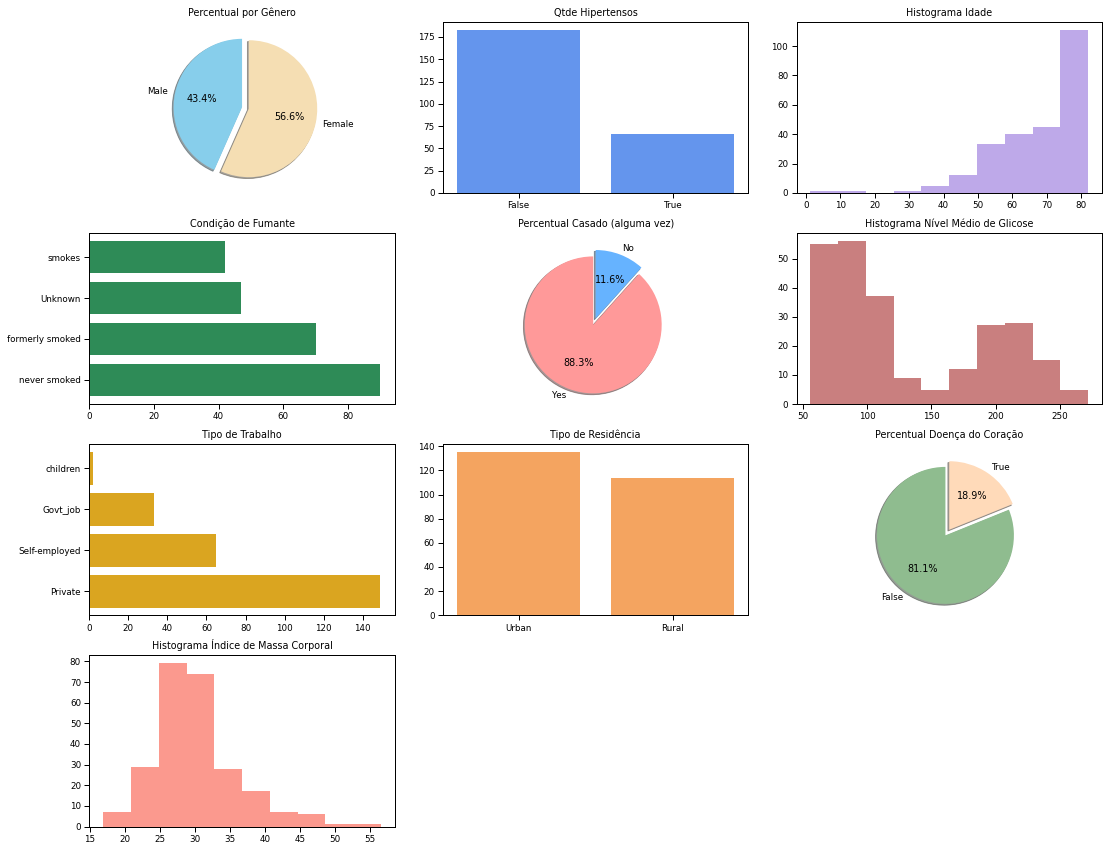

In [28]:
# Visualizando graficamente os dados dos pacientes que tiveram AVC
plotagem(df4, 0)

Análise dos gráficos pacientes que tiveram AVC:

* O total da base de dados é de 249 registros, ou seja, 249 pacientes tiveram AVC no conjunto de 5110 pacientes.
* Em relação ao gênero, 43,4% é do gênero masculino e 56,6% é do gênero feminino. Ou seja, percebe-se que não há uma correlação forte do gênero em relação a quem teve o AVC e o percentual dos gêneros se aproxima ao da base original.
* Sobre a hipertensão, a maioria dos pacientes não são hipertensos. Existem apenas 66 hipertensos.
* A distribuição das idades não é uma distribuição normal. Percebe-se que a faixa etária dos pacientes que tiveram AVC está acima de 40 anos, com uma concentração entre 60 e 80 anos. O mesmo resultado encontrado nos gráficos analisados anteriormente.
* 90 pacientes nunca fumaram e 70 são ex-fumantes. Apenas 42 fumam e 47 não tem essa informação.
* Em torno de 88% dos pacientes são ou foram casados contra 11% dos pacientes solteiros. Ou seja, a maior parte dos pacientes que sofreram AVC eram casados.
* A maior parte dos pacientes possuem o nível de glicose abaixo de 120, embora tenham alguns que sofreram o AVC com um nível de glicose mais elevado, na entre 160 e 220, em torno de 84 pacientes.
* Foi identificado apenas 2 pacientes crianças que tiveram AVC. Em relação aos adultos, a maior parte trabalha em empregos privados, 149 pacientes, 65 são autônomos e 33 trabalham no governo.
* O tipo de residência é bem equilibrado, ficando em torno de 50% rural e 50% urbana.
* 18% possuem doença do coração, esse percentual é bem superior ao observado na base origina.
* O índice de massa corporal possui uma distribuição assimétrica à direita ou positiva, sendo que a maior parte dos pacientes possui "bmi" entre 25 e 35. É a mesma tendência encontrada na base completa.

### 6 - CONCLUSÃO

A análise exploratória da base de dados do AVC foi realizada no google colab, utilizando o python e o jupyter notebook. Teve as seguintes etapas:
* remoção de outliers
* substituição de dados "missing" do bmi pela média dos gêneros encontrada
* análise da correlação de Pearson e Spearman
* recursos visuais para apresentação dos dados e aprofundamento sobre os mesmos
* slice da base para um melhor entendimento sobre os pacientes que tiveram AVC

Conclui-se que a idade é o fator preponderante para a predisposição ao AVC. Entretanto, pela análise de correlação, as correlações encontradas foram fracas em relação a ter ou não AVC. 

Outros gráficos, entretanto, mostraram que o índice de massa corporal muito elevado foi detectado em pessoas que tiveram o AVC, assim como foi encontrado um nível médio de glicose no sangue elevado. A hipertensão não é um fator prepoderante, porém o percentual aumenta substancialmente nos pacientes que tiveram AVC em relação à análise da base original. Também não foi percebido relação com o fato de ser fumante ou não para a predisposição ao AVC.
